Modelin Öğrendiği Katsayılar:
  x: 1.2222
  x^2: -0.0048
  x^3: 0.0001
  Sabit (bias): 74.7103

 Eğitim Hatası (Train MSE): 25.96   | R²: 0.9453
 Test Hatası    (Test MSE): 27.33   | R²: 0.9439
 Eğitim Süresi: 0.0004 saniye


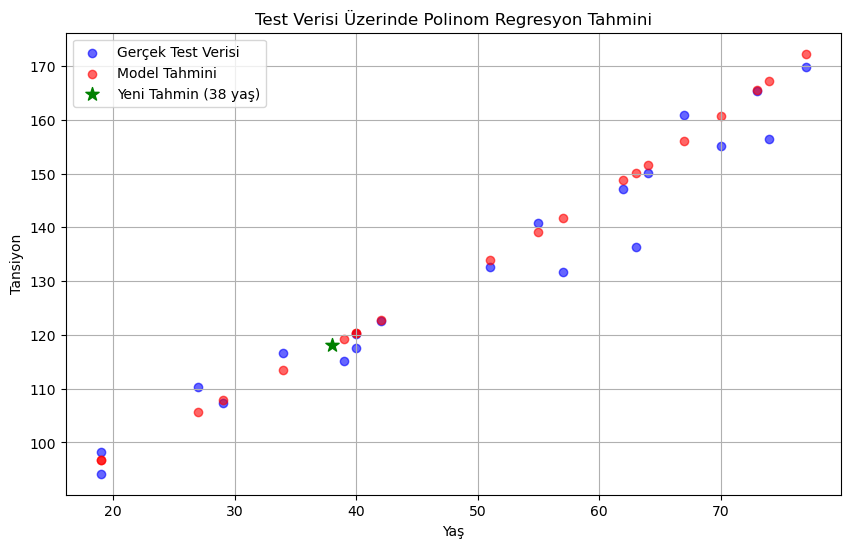

🔁 Aynı yaşa sahip birden fazla kişi olan satırlar:
    Yaş    Tansiyon
2    19   97.433869
10   19   98.175261
45   19   94.178405
5    22  105.262761
16   22  100.642590
..  ...         ...
91   74  162.346614
83   74  156.336312
75   75  167.577933
56   75  172.948773
26   75  164.452743

[75 rows x 2 columns]
38 yaşındaki kişinin tahmin edilen tansiyonu: 118.09


In [7]:
# kütüphaneler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import time
from sklearn.model_selection import train_test_split

# yaşlar: 100 kişi, 18-80 yaş arasında (aynı yaşta birden fazla kişi olabilir)
yaslar = np.random.randint(18, 81, size=100)

# gürültü (herkeste küçük fark olsun): ortalama 0, std 5
noise = np.random.normal(0, 5, size=100)

# tansiyon = yaş³ gibi polinom fonksiyon + gürültü
tansiyon = 0.0001 * yaslar**3 - 0.01 * yaslar**2 + 1.5 * yaslar + 70 + noise

# x şekli (100,1) olmalı → sklearn böyle ister
x = yaslar.reshape(-1, 1)
y = tansiyon
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #Veriyi %80 eğitim ve %20 test olarak ayırdık.
#Acaba hiç görmediği veride de başarılı mı

#polinom Özellik Oluştur (3. Derece)
poly = PolynomialFeatures(degree=3, include_bias=False) #x, x², x³ gibi özellikler oluşturacağız, sabit terim modele kalmış
x_train_poly = poly.fit_transform(x_train) #Hem polinom dönüşümünü öğren hem de uygula.#biz istiyoruz ki eğriyi yakalasın (çünkü tansiyon yaşla doğrusal değil).
x_test_poly = poly.transform(x_test) #Test verisine aynı polinom dönüşümünü uygula.

#model kur ve Eğit
model = LinearRegression()
start = time.time()
model.fit(x_train_poly, y_train) #Modeli eğitiyoruz. Polinomdan elde ettiğimiz özelliklerle. uygun formülü bulmaya çalışıyor
end = time.time()

#tahmin Yap
y_train_pred = model.predict(x_train_poly)  #Modelin eğitim ve test verisi üzerindeki tahminlerini alıyoruz.
y_test_pred = model.predict(x_test_poly) #önceden hiç görmediği yaşlar için tansiyon tahmini yapmasını isteriz
#modelin hiç görmediği yaşlar var test setinde (yani x_test_poly içinde)

#hata Metrikleri
train_mse = mean_squared_error(y_train, y_train_pred) #Gerçek değerlerle tahmin arasındaki farkın karelerinin ortalaması (MSE)
#Model, gördüğü verilerde (eğitim verisi) ne kadar hata yapmış?
test_mse = mean_squared_error(y_test, y_test_pred) 
#Model, hiç görmediği yeni yaşlarda ne kadar hata yapıyor?

train_r2 = r2_score(y_train, y_train_pred) #R² skoru: 1’e ne kadar yakınsa, model o kadar iyi train_r2: Model kendi gördüğü verilere ne kadar uyum sağlamış?
test_r2 = r2_score(y_test, y_test_pred) #test_r2: Model hiç görmediği yaşlar karşısında ne kadar güçlü?

#sonuçları Yazdır
print("Modelin Öğrendiği Katsayılar:")
katsayilar = ["x", "x^2", "x^3"]
for i, c in enumerate(model.coef_):
    print(f"  {katsayilar[i]}: {c:.4f}")
print(f"  Sabit (bias): {model.intercept_:.4f}") #katsayıların hangi terime ait olduğunu yazmak için

print(f"\n Eğitim Hatası (Train MSE): {train_mse:.2f}   | R²: {train_r2:.4f}")
print(f" Test Hatası    (Test MSE): {test_mse:.2f}   | R²: {test_r2:.4f}")
print(f" Eğitim Süresi: {end - start:.4f} saniye")

#grafikle Göster
yeni_yas = 38
yeni_x = np.array([[yeni_yas]])
yeni_x_poly = poly.transform(yeni_x)
tahmin = model.predict(yeni_x_poly)
tahmin_edilen_deger = tahmin[0]


#grafik çizimi
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', label='Gerçek Test Verisi', alpha=0.6)
plt.scatter(x_test, y_test_pred, color='red', label='Model Tahmini', alpha=0.6)
plt.scatter(yeni_yas, tahmin[0], color='green', s=100, marker='*', label=f'Yeni Tahmin ({yeni_yas} yaş)')

plt.title("Test Verisi Üzerinde Polinom Regresyon Tahmini")
plt.xlabel("Yaş")
plt.ylabel("Tansiyon")
plt.legend()
plt.grid(True)

plt.show()

import pandas as pd

# Yaş ve tansiyon değerlerini tabloya dökelim
df = pd.DataFrame({'Yaş': yaslar, 'Tansiyon': tansiyon})  #Aynı yaşa sahip birden fazla kişi varsa, bunları grupluyor ve gösteriyoruz.

# Aynı yaşta birden fazla kişi varsa onları filtrele
tekrar_edenler = df.groupby('Yaş').filter(lambda x: len(x) > 1)

# Göster
print("🔁 Aynı yaşa sahip birden fazla kişi olan satırlar:")
print(tekrar_edenler.sort_values('Yaş'))
print(f"38 yaşındaki kişinin tahmin edilen tansiyonu: {tahmin_edilen_deger:.2f}")


